In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
race_df = pd.read_parquet('./data/race_train_prepared.parquet')
race_df = race_df[race_df['fk_score_categ'] != 'medium']
race_df

,example_id,article,answer,question,options,difficulty,text,embeddings_mini_lm,embeddings_bge_large,fk_score,fk_score_categ
0,middle6454.txt,"Hans said to his friend Kurt, ""I'm going to ta...",3,Hans went to London by _ .,['car' 'sea' 'air' 'both sea and land'],M,"### CONTEXT ###\nHans said to his friend Kurt,...","[0.038055792450904846, -0.10164088755846024, 0...","[0.711676299571991, 0.4126167297363281, -0.044...",2.798810,easy
1,middle234.txt,Bob is six years old.He is old enough to go to...,0,What do you think of the boy?,['He is not clever.' 'He is helpful.' 'He is p...,M,### CONTEXT ###\nBob is six years old.He is ol...,"[-0.030051156878471375, 0.022464649751782417, ...","[-0.4282720983028412, 0.38826122879981995, -0....",4.000531,easy
2,middle3148.txt,A teacher stood in front of his history class ...,1,Why did some students stay in their seats?,['Because they were afraid to leave.'\n 'Becau...,M,### CONTEXT ###\nA teacher stood in front of h...,"[-0.008928709663450718, -0.0035763238556683064...","[0.293457567691803, -0.10545913875102997, -0.3...",3.613056,easy
4,middle1266.txt,Some people think only school children do not ...,2,How many pieces of advice does the writer give...,['5.' '4.' '3.' '2.'],M,### CONTEXT ###\nSome people think only school...,"[0.09224450588226318, 0.0763128250837326, 0.05...","[1.0863529443740845, 0.5433937311172485, 0.304...",5.066129,easy
6,middle667.txt,More and more Chinese people care for their ow...,0,Why did most of Chinese people believe to eat ...,['Because the people think Zhang Wuben is a fa...,M,### CONTEXT ###\nMore and more Chinese people ...,"[-0.032137852162122726, 0.01443204004317522, 0...","[-0.08171544224023819, -0.12920860946178436, -...",5.102912,easy
...,...,...,...,...,...,...,...,...,...,...,...
37296,3154.txt,Sometimes you'll hear people say that you can'...,2,What is the passage mainly about?,['How to prepare for your success.' 'How to fa...,C,### CONTEXT ###\nSometimes you'll hear people ...,"[-0.08145900815725327, 0.05152837559580803, 0....","[0.3955683708190918, 0.2593410909175873, 0.310...",22.915212,hard
37297,1616.txt,"A pretty, well-dressed young lady stopped a ta...",0,The young lady was,['clever at making excuse.' 'not late at all.'...,C,"### CONTEXT ###\nA pretty, well-dressed young ...","[-0.015297356992959976, -0.0675896480679512, 0...","[-0.2136244773864746, 0.2980509400367737, -0.6...",5.220553,easy
37298,850.txt,"A fluid is a substance, such as a liquid or ga...",3,"According to paragraph 2, all of the following...",['the breaking apart of water molecules by ult...,C,"### CONTEXT ###\nA fluid is a substance, such ...","[-0.08058983832597733, -0.053635209798812866, ...","[0.17320740222930908, 0.11267031729221344, 0.0...",12.120323,hard
37299,827.txt,The National Trust in Britain plays an increas...,1,The National Trust is _ .,['a rich government department' 'a charity sup...,C,### CONTEXT ###\nThe National Trust in Britain...,"[0.04407892003655434, 0.07030923664569855, 0.0...","[0.7470288276672363, 0.23737327754497528, 0.48...",13.167530,hard


In [3]:
def train_lr_classifier(df, embeddings_col, y_col):
    # Convert the list of lists in X_colname to a numpy array
    X = np.array(df[embeddings_col].tolist())
    
    y = df[y_col]
    
    # Label encoding the target variable
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)
    
    # Initialize LR classifier
    clf = LogisticRegressionCV(cv=5, scoring='f1_macro', max_iter=10000, n_jobs=-1)
    # clf = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000)

    # Fit the classifier
    clf.fit(X, y_encoded)

    return le, clf

In [4]:
le, clf = train_lr_classifier(df=race_df, embeddings_col='embeddings_mini_lm', y_col='fk_score_categ')

In [5]:
def get_predictions(df, le, clf, embeddings_col, y_col):
    # Convert the list of lists in X_colname to a numpy array
    X = np.array(df[embeddings_col].tolist())
    
    y = df[y_col]

    # Label encoding the target variable
    y_encoded = le.transform(y)

    # Predictions
    y_pred_encoded = clf.predict(X)

    # Reverse-transform the predicted and actual labels to their original values
    y_pred = le.inverse_transform(y_pred_encoded)
    y_test = le.inverse_transform(y_encoded)

    # Printing the classification report
    print(classification_report(y_test, y_pred))

    # Plotting the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(7,5))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

              precision    recall  f1-score   support

        easy       0.78      0.76      0.77     12434
        hard       0.77      0.78      0.78     12434

    accuracy                           0.77     24868
   macro avg       0.77      0.77      0.77     24868
weighted avg       0.77      0.77      0.77     24868



c:\Users\vilce\AppData\Local\miniconda3\envs\llm_env\Lib\site-packages\IPython\core\pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\vilce\AppData\Local\miniconda3\envs\llm_env\Lib\site-packages\IPython\core\pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\vilce\AppData\Local\miniconda3\envs\llm_env\Lib\site-packages\IPython\core\pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\vilce\AppData\Local\miniconda3\envs

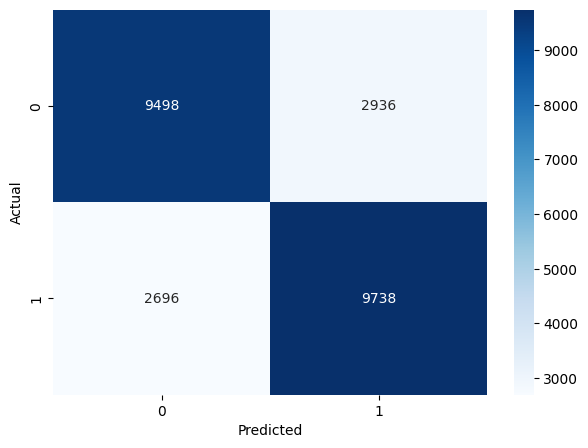

In [6]:
get_predictions(df=race_df, le=le, clf=clf, embeddings_col='embeddings_mini_lm', y_col='fk_score_categ')

In [7]:
# race_df['score_easy'] = clf.predict_proba(X=np.array(race_df['embeddings_mini_lm'].tolist()))[:,0]
# race_df['score_hard'] = clf.predict_proba(X=np.array(race_df['embeddings_mini_lm'].tolist()))[:,1]
# race_df['score_medium'] = clf.predict_proba(X=np.array(race_df['embeddings_mini_lm'].tolist()))[:,2]

# race_df['w_easy_embeddings'] = race_df['embeddings_mini_lm'].apply(lambda x: x * clf.coef_[0])
# race_df['w_hard_embeddings'] = race_df['embeddings_mini_lm'].apply(lambda x: x * clf.coef_[1])
# race_df['w_medium_embeddings'] = race_df['embeddings_mini_lm'].apply(lambda x: x * clf.coef_[2])
# race_df['iw_easy_embeddings'] = race_df['embeddings_mini_lm'].apply(lambda x: x / clf.coef_[0])
# race_df['iw_hard_embeddings'] = race_df['embeddings_mini_lm'].apply(lambda x: x / clf.coef_[1])
# race_df['iw_medium_embeddings'] = race_df['embeddings_mini_lm'].apply(lambda x: x / clf.coef_[2])

race_df['score'] = clf.predict_proba(X=np.array(race_df['embeddings_mini_lm'].tolist()))[:,1]
race_df['w_embeddings'] = race_df['embeddings_mini_lm'].apply(lambda x: x * clf.coef_[0])
race_df['iw_embeddings'] = race_df['embeddings_mini_lm'].apply(lambda x: x / clf.coef_[0])

In [8]:
def get_cluster_stats(df, cluster_col, score_col):
    return df.groupby(cluster_col).agg(
        score_mean=pd.NamedAgg(column=score_col, aggfunc='mean'), 
        score_std =pd.NamedAgg(column=score_col, aggfunc='std')
    ).reset_index(drop=False).rename(columns={cluster_col: 'cluster_id'})

n_clusters = 20
seed=0
uw_kmeans = KMeans(n_clusters=n_clusters, random_state=seed, n_init="auto").fit( [v for v in race_df['embeddings_mini_lm']])
w_kmeans = KMeans(n_clusters=n_clusters, random_state=seed, n_init="auto").fit( [v for v in race_df['w_embeddings']])
iw_kmeans = KMeans(n_clusters=n_clusters, random_state=seed, n_init="auto").fit( [v for v in race_df['iw_embeddings']])

race_df['uw_kmeans'] = uw_kmeans.labels_
race_df['w_kmeans'] = w_kmeans.labels_
race_df['iw_kmeans'] = iw_kmeans.labels_

# cs_unweighted = get_cluster_stats(dd2, 'unweighted_kmeans', 'score')
# cs_weighted = get_cluster_stats(dd2, 'weighted_kmeans', 'score')
# cs_inverse_weighted = get_cluster_stats(dd2, 'inverse_weighted_kmeans', 'score')

In [9]:
cluster_df = race_df[['uw_kmeans', 'w_kmeans', 'iw_kmeans', 'score']]
cluster_df = pd.melt(cluster_df, id_vars=['score'], var_name='weighting', value_name='cluster_id')
cluster_df = cluster_df.groupby(["weighting", "cluster_id"]).mean().reset_index()

[Text(0, 0.5, '')]

c:\Users\vilce\AppData\Local\miniconda3\envs\llm_env\Lib\site-packages\IPython\core\pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\vilce\AppData\Local\miniconda3\envs\llm_env\Lib\site-packages\IPython\core\pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\vilce\AppData\Local\miniconda3\envs\llm_env\Lib\site-packages\IPython\core\pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\vilce\AppData\Local\miniconda3\envs

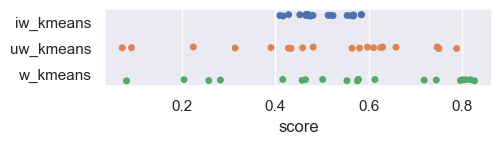

In [10]:
sns.set(rc={"figure.figsize":(5, 1)})
ax = sns.stripplot(x='score', y='weighting', data=cluster_df, jitter=True, hue='weighting', dodge=True, legend=False)
ax.set(ylabel=None)

In [11]:
cluster_df[['weighting', 'score']].groupby('weighting').std() # standard deviation of mean scores across clusters

,score
weighting,
iw_kmeans,0.055939
uw_kmeans,0.209911
w_kmeans,0.222472


c:\Users\vilce\AppData\Local\miniconda3\envs\llm_env\Lib\site-packages\IPython\core\pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\vilce\AppData\Local\miniconda3\envs\llm_env\Lib\site-packages\IPython\core\pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\vilce\AppData\Local\miniconda3\envs\llm_env\Lib\site-packages\IPython\core\pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\vilce\AppData\Local\miniconda3\envs

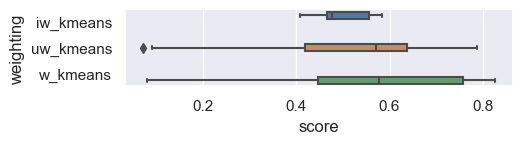

In [12]:
g = sns.boxplot(x='score', y ='weighting', data = cluster_df, hue ='weighting')
g.legend([],[], frameon=False)